## Battle of The Neighborhoods

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


### Read and visualize Consumer Expenditure data

In [2]:
annual_ce = pd.read_csv('C:\\Users\\MN101994\\Desktop\\DS\\Capstone\\ConEx.csv')

annual_ce

,Area,Average Annual Expenditures
0,United States,58681
1,San Diego,79585


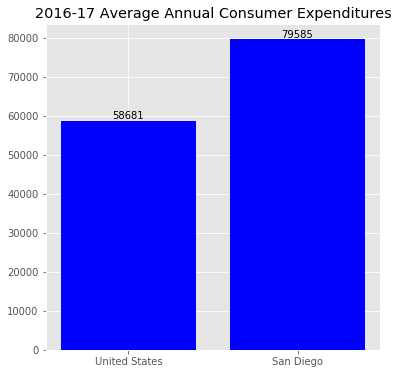

In [3]:
# generate consuler expenditure bar plot

fig, ax = plt.subplots(figsize=(6,6))

bar_x = annual_ce['Area']
bar_height = annual_ce['Average Annual Expenditures']
bar_tick_label = ['United States', 'San Diego']
bar_label = [58681,79585]

bar_plot = plt.bar(bar_x,bar_height,tick_label=bar_tick_label, color='blue')

def autolabel(rects):
    for idx,rect in enumerate(bar_plot):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1*height,
                bar_label[idx],
                ha='center', va='bottom')

autolabel(bar_plot)

plt.title('2016-17 Average Annual Consumer Expenditures')

plt.show()

### Read and visualize Consumer Expenditure Distribution data

In [4]:
# The code was removed by Watson Studio for sharing.

,Category,United States,San Diego
0,Food,12.7,12.5
1,Alcoholic beverages,0.9,1.4
2,Housing,33.0,35.9
3,Apparel and services,3.1,3.2
4,Transportation,15.9,13.3
5,Healthcare,8.1,6.6
6,Entertainment,5.2,5.7
7,Personal care products and services,1.3,1.4
8,Reading,0.2,0.2
9,Education,2.4,3.1


In [5]:
# reshape the dataframe to fit a side by side bar chart

dist_reshaped = pd.melt(annual_ce_dist, id_vars=['Category'], var_name='Area', value_name='Percentage')
dist_reshaped

us_dist = dist_reshaped[dist_reshaped.Area.isin(['United States'])]['Percentage']
us_dist

0     12.7
1      0.9
2     33.0
3      3.1
4     15.9
5      8.1
6      5.2
7      1.3
8      0.2
9      2.4
10     0.6
11     1.7
12     3.4
13    11.6
Name: Percentage, dtype: float64

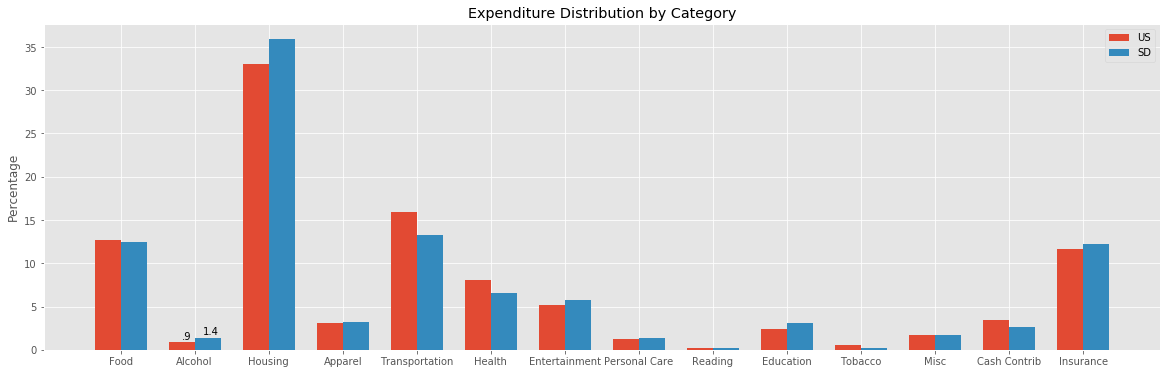

In [6]:
# generate side by side bar chart

import numpy as np
fig, ax = plt.subplots(figsize=(20,6))
N = 14
us_dist = dist_reshaped[dist_reshaped.Area.isin(['United States'])]['Percentage']
sd_dist = dist_reshaped[dist_reshaped.Area.isin(['San Diego'])]['Percentage']

ind = np.arange(N) 
width = 0.35       
plt.bar(ind, us_dist, width, label='US')
plt.bar(ind + width, sd_dist, width,
    label='SD')

plt.ylabel('Percentage')
plt.title('Expenditure Distribution by Category')

plt.xticks(ind + width / 2, ('Food', 'Alcohol', 'Housing', 'Apparel', 'Transportation','Health', 'Entertainment', 'Personal Care', 
                             'Reading', 'Education','Tobacco','Misc', 'Cash Contrib', 'Insurance'))
plt.legend(loc='best')

# annotate US alcohol text
plt.annotate('.9',
             xy=(1, 1),                    
             rotation=0,                  
             va='bottom',                    
             ha='left',                      
            )

# annotate SD alcohol text
plt.annotate('1.4',
             xy=(1.5, 1.5),                    
             rotation=0,                  
             va='bottom',                    
             ha='right',                      
            )
plt.show()

### Get and visualize San Diego data

In [7]:
#use geopy to get coordinates of San Diego, CA

address = 'San Diego, CA'

geolocator = Nominatim(user_agent="sd_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of San Diego are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of San Diego are 32.7174209, -117.1627714.


In [8]:
#create a map of San Diego using latitude and longitude values

map_sd = folium.Map(location=[latitude, longitude], zoom_start=12)

# add a red circle marker to represent the coordinates returned from geopy
folium.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Downtown San Diego',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(map_sd)
    
map_sd

In [9]:
# The code was removed by Watson Studio for sharing.

### Get and Visualize Brewery data from Foursquare

In [10]:
#search for a brewery category on Foursquare

search_query = 'Brewery'
radius = 5000


In [11]:
#define the Foursquare URL

url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius)
url

'https://api.foursquare.com/v2/venues/search?client_id=2X25DXGACXCIMCHNKKMOTHTXPNDAP2ANUMHFIPJPIGXP2N03&client_secret=EKKJYCVXAXI45E2IRVW2Q53SI01KZKYGH2VJGWWN35QDOAAG&ll=32.7174209,-117.1627714&v=20180605&query=Brewery&radius=5000'

In [12]:
#get results
results = requests.get(url).json()

results

{'meta': {'code': 200, 'requestId': '5d14477cdb1d81002c3eb2ab'},
 'response': {'venues': [{'id': '40e0b100f964a52052021fe3',
    'name': 'Karl Strauss Brewery & Restaurant',
    'location': {'address': '1157 Columbia St',
     'crossStreet': 'at W B St',
     'lat': 32.71752458907822,
     'lng': -117.16719407300573,
     'labeledLatLngs': [{'label': 'display',
       'lat': 32.71752458907822,
       'lng': -117.16719407300573}],
     'distance': 414,
     'postalCode': '92101',
     'cc': 'US',
     'city': 'San Diego',
     'state': 'CA',
     'country': 'United States',
     'formattedAddress': ['1157 Columbia St (at W B St)',
      'San Diego, CA 92101',
      'United States']},
    'categories': [{'id': '50327c8591d4c4b30a586d5d',
      'name': 'Brewery',
      'pluralName': 'Breweries',
      'shortName': 'Brewery',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/brewery_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1561610109',


In [13]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,categories,delivery.id,delivery.provider.icon.name,delivery.provider.icon.prefix,delivery.provider.icon.sizes,delivery.provider.name,delivery.url,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'id': '50327c8591d4c4b30a586d5d', 'name': 'B...",NaN,NaN,NaN,NaN,NaN,NaN,False,40e0b100f964a52052021fe3,1157 Columbia St,US,San Diego,United States,at W B St,414,"[1157 Columbia St (at W B St), San Diego, CA 9...","[{'label': 'display', 'lat': 32.71752458907822...",32.717525,-117.167194,NaN,92101,CA,Karl Strauss Brewery & Restaurant,v-1561610109,NaN
1,"[{'id': '50327c8591d4c4b30a586d5d', 'name': 'B...",NaN,NaN,NaN,NaN,NaN,NaN,False,55d7e04c498ed9c37a6cef44,1971 India St,US,San Diego,United States,NaN,1050,"[1971 India St, San Diego, CA 92101, United St...","[{'label': 'display', 'lat': 32.72534560154953...",32.725346,-117.168871,NaN,92101,CA,Bolt Brewery,v-1561610109,NaN
2,"[{'id': '56aa371ce4b08b9a8d57356c', 'name': 'B...",NaN,NaN,NaN,NaN,NaN,NaN,False,51789e8fe4b076e1bce5cfc4,4223 30th St,US,San Diego,United States,El Cajon Blvd,5149,"[4223 30th St (El Cajon Blvd), San Diego, CA 9...","[{'label': 'display', 'lat': 32.75460899954223...",32.754609,-117.130057,NaN,92104,CA,Belching Beaver Brewery Tasting Room,v-1561610109,NaN
3,"[{'id': '50327c8591d4c4b30a586d5d', 'name': 'B...",NaN,NaN,NaN,NaN,NaN,NaN,False,59745878acc5f541280fa78c,1320 5th Ave,US,San Diego,United States,1320 5th Ave,277,"[1320 5th Ave (1320 5th Ave), San Diego, CA 92...","[{'label': 'display', 'lat': 32.719048, 'lng':...",32.719048,-117.160530,Central San Diego,92101,CA,Ko Underground Brewery,v-1561610109,NaN
4,"[{'id': '56aa371be4b08b9a8d573520', 'name': 'T...",NaN,NaN,NaN,NaN,NaN,NaN,False,52c5b12e498ec7b3105103b8,241 14th St,US,San Diego,United States,NaN,1367,"[241 14th St, San Diego, CA 92101, United States]","[{'label': 'display', 'lat': 32.70911252471649...",32.709113,-117.152023,NaN,92101,CA,San Diego Brewery Tours,v-1561610109,77375785


In [14]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered.head()

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,Karl Strauss Brewery & Restaurant,Brewery,1157 Columbia St,US,San Diego,United States,at W B St,414,"[1157 Columbia St (at W B St), San Diego, CA 9...","[{'label': 'display', 'lat': 32.71752458907822...",32.717525,-117.167194,NaN,92101,CA,40e0b100f964a52052021fe3
1,Bolt Brewery,Brewery,1971 India St,US,San Diego,United States,NaN,1050,"[1971 India St, San Diego, CA 92101, United St...","[{'label': 'display', 'lat': 32.72534560154953...",32.725346,-117.168871,NaN,92101,CA,55d7e04c498ed9c37a6cef44
2,Belching Beaver Brewery Tasting Room,Beer Bar,4223 30th St,US,San Diego,United States,El Cajon Blvd,5149,"[4223 30th St (El Cajon Blvd), San Diego, CA 9...","[{'label': 'display', 'lat': 32.75460899954223...",32.754609,-117.130057,NaN,92104,CA,51789e8fe4b076e1bce5cfc4
3,Ko Underground Brewery,Brewery,1320 5th Ave,US,San Diego,United States,1320 5th Ave,277,"[1320 5th Ave (1320 5th Ave), San Diego, CA 92...","[{'label': 'display', 'lat': 32.719048, 'lng':...",32.719048,-117.160530,Central San Diego,92101,CA,59745878acc5f541280fa78c
4,San Diego Brewery Tours,Tour Provider,241 14th St,US,San Diego,United States,NaN,1367,"[241 14th St, San Diego, CA 92101, United States]","[{'label': 'display', 'lat': 32.70911252471649...",32.709113,-117.152023,NaN,92101,CA,52c5b12e498ec7b3105103b8


In [15]:
# return the size of the data frame
dataframe_filtered.groupby(['categories']).size()

categories
Beer Bar                                     2
Beer Garden                                  1
Brewery                                     14
Gastropub                                    1
Real Estate Office                           1
Residential Building (Apartment / Condo)     1
Tour Provider                                2
dtype: int64

In [16]:
# keep only brewery related records and view results
dataframe_filtered_brew = dataframe_filtered[dataframe_filtered.categories.isin(['Beer Bar', 'Beer Garden','Brewery', 'Gastropub'])]
dataframe_filtered_brew.groupby(['categories']).size()

dataframe_filtered_brew.head()

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,Karl Strauss Brewery & Restaurant,Brewery,1157 Columbia St,US,San Diego,United States,at W B St,414,"[1157 Columbia St (at W B St), San Diego, CA 9...","[{'label': 'display', 'lat': 32.71752458907822...",32.717525,-117.167194,NaN,92101,CA,40e0b100f964a52052021fe3
1,Bolt Brewery,Brewery,1971 India St,US,San Diego,United States,NaN,1050,"[1971 India St, San Diego, CA 92101, United St...","[{'label': 'display', 'lat': 32.72534560154953...",32.725346,-117.168871,NaN,92101,CA,55d7e04c498ed9c37a6cef44
2,Belching Beaver Brewery Tasting Room,Beer Bar,4223 30th St,US,San Diego,United States,El Cajon Blvd,5149,"[4223 30th St (El Cajon Blvd), San Diego, CA 9...","[{'label': 'display', 'lat': 32.75460899954223...",32.754609,-117.130057,NaN,92104,CA,51789e8fe4b076e1bce5cfc4
3,Ko Underground Brewery,Brewery,1320 5th Ave,US,San Diego,United States,1320 5th Ave,277,"[1320 5th Ave (1320 5th Ave), San Diego, CA 92...","[{'label': 'display', 'lat': 32.719048, 'lng':...",32.719048,-117.160530,Central San Diego,92101,CA,59745878acc5f541280fa78c
5,Thorn Street Brewery,Brewery,3176 Thorn St,US,San Diego,United States,at 32nd St,4263,"[3176 Thorn St (at 32nd St), San Diego, CA 921...","[{'label': 'display', 'lat': 32.739407, 'lng':...",32.739407,-117.125496,NaN,92104,CA,50ac5b75e4b0e68f4018f430


In [17]:
# Generate a map of breweries 

# add the breweries as blue circle markers
for lat, lng, label in zip(dataframe_filtered_brew.lat, dataframe_filtered_brew.lng, dataframe_filtered_brew.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(map_sd)

# display map
map_sd

### Get and explore San Diego neighborhood data

In [18]:
# The code was removed by Watson Studio for sharing.

,tract,sra,sra_name,msa,msa_name,lon,lat
0,15.00,1,CENTRAL SAN DIEGO,0,CENTRAL,-117.123317,32.743750
1,16.00,6,MID-CITY,0,CENTRAL,-117.121322,32.752161
2,17.00,6,MID-CITY,0,CENTRAL,-117.120640,32.758246
3,18.00,6,MID-CITY,0,CENTRAL,-117.118525,32.762886
4,19.00,6,MID-CITY,0,CENTRAL,-117.119155,32.769539
5,20.01,6,MID-CITY,0,CENTRAL,-117.104249,32.769867
6,20.02,6,MID-CITY,0,CENTRAL,-117.092851,32.764524
7,21.00,6,MID-CITY,0,CENTRAL,-117.108464,32.758679
8,22.01,6,MID-CITY,0,CENTRAL,-117.112496,32.752481
9,22.02,6,MID-CITY,0,CENTRAL,-117.105102,32.752397


In [19]:
neighborhoods.groupby('msa_name').count()['sra_name']

msa_name
CENTRAL              148
EAST COUNTY            6
EAST SUBURBAN        102
NORTH CITY           151
NORTH COUNTY EAST     81
NORTH COUNTY WEST     69
SOUTH SUBURBAN        70
Name: sra_name, dtype: int64

In [20]:
# keep central data
central_data = neighborhoods[neighborhoods['msa_name'] == 'CENTRAL'].reset_index(drop=True)
central_data.head()

,tract,sra,sra_name,msa,msa_name,lon,lat
0,15.0,1,CENTRAL SAN DIEGO,0,CENTRAL,-117.123317,32.743750
1,16.0,6,MID-CITY,0,CENTRAL,-117.121322,32.752161
2,17.0,6,MID-CITY,0,CENTRAL,-117.120640,32.758246
3,18.0,6,MID-CITY,0,CENTRAL,-117.118525,32.762886
4,19.0,6,MID-CITY,0,CENTRAL,-117.119155,32.769539


In [21]:
# list remaining neighborhoods

neigh_list = central_data['sra_name'].unique().tolist()

for n in neigh_list:
    print(n)

CENTRAL SAN DIEGO
MID-CITY
SOUTHEASTERN SAN DIEGO
PENINSULA
CORONADO
NATIONAL CITY


### Get and visualize venue data using the Central neighborhood and Foursquare

In [22]:
# create function to get near venues

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            100)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [23]:
sd_venues = getNearbyVenues(names=central_data['sra_name'],
                                   latitudes=central_data['lat'],
                                   longitudes=central_data['lon'])

CENTRAL SAN DIEGO
MID-CITY
MID-CITY
MID-CITY
MID-CITY
MID-CITY
MID-CITY
MID-CITY
MID-CITY
MID-CITY
MID-CITY
MID-CITY
MID-CITY
MID-CITY
MID-CITY
MID-CITY
MID-CITY
MID-CITY
MID-CITY
MID-CITY
CENTRAL SAN DIEGO
CENTRAL SAN DIEGO
CENTRAL SAN DIEGO
CENTRAL SAN DIEGO
CENTRAL SAN DIEGO
CENTRAL SAN DIEGO
CENTRAL SAN DIEGO
CENTRAL SAN DIEGO
CENTRAL SAN DIEGO
CENTRAL SAN DIEGO
CENTRAL SAN DIEGO
CENTRAL SAN DIEGO
CENTRAL SAN DIEGO
CENTRAL SAN DIEGO
CENTRAL SAN DIEGO
SOUTHEASTERN SAN DIEGO
SOUTHEASTERN SAN DIEGO
SOUTHEASTERN SAN DIEGO
SOUTHEASTERN SAN DIEGO
SOUTHEASTERN SAN DIEGO
SOUTHEASTERN SAN DIEGO
SOUTHEASTERN SAN DIEGO
SOUTHEASTERN SAN DIEGO
SOUTHEASTERN SAN DIEGO
SOUTHEASTERN SAN DIEGO
SOUTHEASTERN SAN DIEGO
SOUTHEASTERN SAN DIEGO
SOUTHEASTERN SAN DIEGO
MID-CITY
MID-CITY
MID-CITY
MID-CITY
MID-CITY
MID-CITY
MID-CITY
MID-CITY
MID-CITY
MID-CITY
MID-CITY
MID-CITY
MID-CITY
MID-CITY
MID-CITY
SOUTHEASTERN SAN DIEGO
SOUTHEASTERN SAN DIEGO
SOUTHEASTERN SAN DIEGO
SOUTHEASTERN SAN DIEGO
SOUTHEASTERN SA

In [24]:
print(sd_venues.shape)
sd_venues.head()

(2269, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,CENTRAL SAN DIEGO,32.743750,-117.123317,Panchita's Kitchen & Bakery,32.747576,-117.124877,Bakery
1,CENTRAL SAN DIEGO,32.743750,-117.123317,Chris's Market,32.741860,-117.120750,Liquor Store
2,CENTRAL SAN DIEGO,32.743750,-117.123317,Vintage Religion,32.747923,-117.124844,Art Gallery
3,CENTRAL SAN DIEGO,32.743750,-117.123317,North Park Nursery by Mooch,32.739580,-117.125186,Garden
4,MID-CITY,32.752161,-117.121322,"Streetcar Merchants Of Fried Chicken, Doughnut...",32.749813,-117.120060,Fried Chicken Joint


### Cluster neighborhoods

In [25]:
# how many venues were returned for each neighborhood

sd_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
CENTRAL SAN DIEGO,1194,1194,1194,1194,1194,1194
CORONADO,84,84,84,84,84,84
MID-CITY,326,326,326,326,326,326
NATIONAL CITY,172,172,172,172,172,172
PENINSULA,314,314,314,314,314,314
SOUTHEASTERN SAN DIEGO,179,179,179,179,179,179


In [26]:
print('There are {} uniques categories.'.format(len(sd_venues['Venue Category'].unique())))

There are 298 uniques categories.


In [27]:
#Analyze each neighborhood

# one hot encoding
sd_onehot = pd.get_dummies(sd_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
sd_onehot['Neighborhood'] = sd_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [sd_onehot.columns[-1]] + list(sd_onehot.columns[:-1])
sd_onehot =sd_onehot[fixed_columns]

sd_onehot.head()

,Zoo Exhibit,ATM,Accessories Store,Acupuncturist,Adult Boutique,African Restaurant,Airport,Airport Terminal,American Restaurant,Amphitheater,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Store,Big Box Store,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Buffet,Building,Burger Joint,Burrito Place,Bus Station,Bus Stop,Business Service,Cable Car,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Circus,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Credit Union,Creperie,Cruise,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Dry Cleaner,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Entertainment Service,Ethiopian Restaurant,Exhibit,Eye Doctor,Fabric Shop,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Flea Market,Flower Shop,Fondue Restaurant,Food,Food & Drink Shop,Food Court,Food Truck,Football Stadium,Fountain,Frame Store,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,German Restaurant,Gift Shop,Go Kart Track,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,High School,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Theater,Indoor Play Area,Intersection,Irish Pub,Island,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Latin American Restaurant,Laundromat,Lawyer,Leather Goods Store,Library,Light Rail Station,Lighting Store,Lingerie Store,Liquor Store,Locksmith,Lounge,Marijuana Dispensary,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Moroccan Restaurant,Motel,Motorcycle Shop,Movie Theater,Museum,Music Store,Music Venue,Nail Salon,Nature Preserve,Neighborhood,New American Restaurant,Night Market,Nightclub,Noodle House,Nursery School,Office,Optical Shop,Other Nightlife,Other Repair Shop,Outdoors & Recreation,Outlet Store,Paper / Office Supplies Store,Park,Parking,Pawn Shop,Pedestrian Plaza,Performing Arts Venue,Pet Service,Pet Store,Pharmacy,Photography Studio,Piano Bar,Pier,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Port,Post Office,Pub,Ramen Restaurant,Record Shop,Recording Studio,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Resort,Restaurant,Rock Club,Russian Restaurant,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Science Museum,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Smoke Shop,Snack Place,Soccer Field,South American Restaurant,Southern / Soul Food Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,State / Provincial Park,Steakhouse,Storage Facility,Street Food Gathering,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Tailor Shop,Tapas Restaurant,Tattoo Parlor,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Theme Restaurant,Thrift / Vintage Store,Tiki Bar,Toll Plaza,Tourist Information Center,Trail,Train,Train Station,Turkish Restaurant,Vape Store,Ve

In [28]:
# check new DataFrame size

sd_onehot.shape

(2269, 298)

In [29]:
# group rows by neighborhood and compute the mean

sd_grouped = sd_onehot.groupby('Neighborhood').mean().reset_index()
sd_grouped

,Neighborhood,Zoo Exhibit,ATM,Accessories Store,Acupuncturist,Adult Boutique,African Restaurant,Airport,Airport Terminal,American Restaurant,Amphitheater,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Store,Big Box Store,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Buffet,Building,Burger Joint,Burrito Place,Bus Station,Bus Stop,Business Service,Cable Car,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Circus,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Credit Union,Creperie,Cruise,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Dry Cleaner,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Entertainment Service,Ethiopian Restaurant,Exhibit,Eye Doctor,Fabric Shop,Farm,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Flea Market,Flower Shop,Fondue Restaurant,Food,Food & Drink Shop,Food Court,Food Truck,Football Stadium,Fountain,Frame Store,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,German Restaurant,Gift Shop,Go Kart Track,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,High School,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotel Pool,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Theater,Indoor Play Area,Intersection,Irish Pub,Island,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Latin American Restaurant,Laundromat,Lawyer,Leather Goods Store,Library,Light Rail Station,Lighting Store,Lingerie Store,Liquor Store,Locksmith,Lounge,Marijuana Dispensary,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Moroccan Restaurant,Motel,Motorcycle Shop,Movie Theater,Museum,Music Store,Music Venue,Nail Salon,Nature Preserve,New American Restaurant,Night Market,Nightclub,Noodle House,Nursery School,Office,Optical Shop,Other Nightlife,Other Repair Shop,Outdoors & Recreation,Outlet Store,Paper / Office Supplies Store,Park,Parking,Pawn Shop,Pedestrian Plaza,Performing Arts Venue,Pet Service,Pet Store,Pharmacy,Photography Studio,Piano Bar,Pier,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Port,Post Office,Pub,Ramen Restaurant,Record Shop,Recording Studio,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Resort,Restaurant,Rock Club,Russian Restaurant,Salon / Barbershop,Sandwich Place,Scenic Lookout,School,Science Museum,Sculpture Garden,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Smoke Shop,Snack Place,Soccer Field,South American Restaurant,Southern / Soul Food Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Sports Club,State / Provincial Park,Steakhouse,Storage Facility,Street Food Gathering,Supermarket,Supplement Shop,Sushi Restaurant,Taco Place,Tailor Shop,Tapas Restaurant,Tattoo Parlor,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Theme Restaurant,Thrift / Vintage Store,Tiki Bar,Toll Plaza,Tourist Information Center,Trail,Train,Train Station,Turkish Restaurant,Vape Store,Ve

In [30]:
# print each neighborhood and its top five venues

num_top_venues = 5

for hood in sd_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = sd_grouped[sd_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----CENTRAL SAN DIEGO----
                 venue  freq
0          Coffee Shop  0.05
1   Mexican Restaurant  0.05
2                Hotel  0.03
3                 Café  0.03
4  American Restaurant  0.03


----CORONADO----
                 venue  freq
0          Coffee Shop  0.05
1        Grocery Store  0.05
2                Hotel  0.04
3  American Restaurant  0.04
4         Burger Joint  0.04


----MID-CITY----
                   venue  freq
0  Vietnamese Restaurant  0.07
1     Mexican Restaurant  0.06
2            Pizza Place  0.05
3                   Park  0.04
4      Convenience Store  0.04


----NATIONAL CITY----
                  venue  freq
0    Mexican Restaurant  0.10
1    Chinese Restaurant  0.05
2           Pizza Place  0.05
3  Fast Food Restaurant  0.05
4     Convenience Store  0.04


----PENINSULA----
                venue  freq
0  Mexican Restaurant  0.07
1                Café  0.05
2         Coffee Shop  0.04
3                 Bar  0.03
4                Park  0.03


----SOUT

In [31]:
# convert into a DataFrame

#sort venues in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [32]:
#create the DataFrame and display the top twenty venues for each neighborhood

num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = sd_grouped['Neighborhood']

for ind in np.arange(sd_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(sd_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,CENTRAL SAN DIEGO,Coffee Shop,Mexican Restaurant,American Restaurant,Café,Hotel
1,CORONADO,Coffee Shop,Grocery Store,American Restaurant,Movie Theater,Park
2,MID-CITY,Vietnamese Restaurant,Mexican Restaurant,Pizza Place,Park,Convenience Store
3,NATIONAL CITY,Mexican Restaurant,Fast Food Restaurant,Pizza Place,Chinese Restaurant,Convenience Store
4,PENINSULA,Mexican Restaurant,Café,Coffee Shop,Bar,Park
5,SOUTHEASTERN SAN DIEGO,Mexican Restaurant,Park,Pizza Place,Food,Convenience Store


In [33]:
#Cluster neighborhoods

# set number of clusters
kclusters = 3

sd_grouped_clustering = sd_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(sd_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 2, 1, 1, 0, 1])

In [34]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)


In [35]:
sd_merged = central_data

# merge sd_grouped with toronto_data to add latitude/longitude for each neighborhood
sd_merged = sd_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='sra_name')

sd_merged

,tract,sra,sra_name,msa,msa_name,lon,lat,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,15.00,1,CENTRAL SAN DIEGO,0,CENTRAL,-117.123317,32.743750,0,Coffee Shop,Mexican Restaurant,American Restaurant,Café,Hotel
1,16.00,6,MID-CITY,0,CENTRAL,-117.121322,32.752161,1,Vietnamese Restaurant,Mexican Restaurant,Pizza Place,Park,Convenience Store
2,17.00,6,MID-CITY,0,CENTRAL,-117.120640,32.758246,1,Vietnamese Restaurant,Mexican Restaurant,Pizza Place,Park,Convenience Store
3,18.00,6,MID-CITY,0,CENTRAL,-117.118525,32.762886,1,Vietnamese Restaurant,Mexican Restaurant,Pizza Place,Park,Convenience Store
4,19.00,6,MID-CITY,0,CENTRAL,-117.119155,32.769539,1,Vietnamese Restaurant,Mexican Restaurant,Pizza Place,Park,Convenience Store
5,20.01,6,MID-CITY,0,CENTRAL,-117.104249,32.769867,1,Vietnamese Restaurant,Mexican Restaurant,Pizza Place,Park,Convenience Store
6,20.02,6,MID-CITY,0,CENTRAL,-117.092851,32.764524,1,Vietnamese Restaurant,Mexican Restaurant,Pizza Place,Park,Convenience Store
7,21.00,6,MID-CITY,0,CENTRAL,-117.108464,32.758679,1,Vietnamese Restaurant,Mexican Restaurant,Pizza Place,Park,Convenience Store
8,22.01,6,MID-CITY,0,CENTRAL,-117.112496,32.752481,1,Vietnamese Restaurant,Mexican Restaurant,Pizza Place,Park,Convenience Store
9,22.02,6,MID-CITY,0,CENTRAL,-117.105102,32.752397,1,Vietnamese Restaurant,Mexican Restaurant,Pizza Place,Park,Convenience Store


In [36]:
#visualize clusters
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(sd_merged['lat'], sd_merged['lon'], sd_merged['sra_name'], sd_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       

for lat, lng, label in zip(dataframe_filtered_brew.lat, dataframe_filtered_brew.lng, dataframe_filtered_brew.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(map_clusters)
    
map_clusters


In [37]:
sd_merged.loc[sd_merged['Cluster Labels'] == 0, sd_merged.columns[[1] + list(range(5, sd_merged.shape[1]))]]

,sra,lon,lat,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,1,-117.123317,32.743750,0,Coffee Shop,Mexican Restaurant,American Restaurant,Café,Hotel
20,1,-117.185957,32.752724,0,Coffee Shop,Mexican Restaurant,American Restaurant,Café,Hotel
21,1,-117.173598,32.753713,0,Coffee Shop,Mexican Restaurant,American Restaurant,Café,Hotel
22,1,-117.174959,32.745342,0,Coffee Shop,Mexican Restaurant,American Restaurant,Café,Hotel
23,1,-117.162233,32.744778,0,Coffee Shop,Mexican Restaurant,American Restaurant,Café,Hotel
24,1,-117.163109,32.753293,0,Coffee Shop,Mexican Restaurant,American Restaurant,Café,Hotel
25,1,-117.151966,32.760485,0,Coffee Shop,Mexican Restaurant,American Restaurant,Café,Hotel
26,1,-117.151728,32.752922,0,Coffee Shop,Mexican Restaurant,American Restaurant,Café,Hotel
27,1,-117.151285,32.744760,0,Coffee Shop,Mexican Restaurant,American Restaurant,Café,Hotel
28,1,-117.142027,32.744784,0,Coffee Shop,Mexican Restaurant,American Restaurant,Café,Hotel


In [38]:
sd_merged.loc[sd_merged['Cluster Labels'] == 1, sd_merged.columns[[1] + list(range(5, sd_merged.shape[1]))]]

,sra,lon,lat,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
1,6,-117.121322,32.752161,1,Vietnamese Restaurant,Mexican Restaurant,Pizza Place,Park,Convenience Store
2,6,-117.120640,32.758246,1,Vietnamese Restaurant,Mexican Restaurant,Pizza Place,Park,Convenience Store
3,6,-117.118525,32.762886,1,Vietnamese Restaurant,Mexican Restaurant,Pizza Place,Park,Convenience Store
4,6,-117.119155,32.769539,1,Vietnamese Restaurant,Mexican Restaurant,Pizza Place,Park,Convenience Store
5,6,-117.104249,32.769867,1,Vietnamese Restaurant,Mexican Restaurant,Pizza Place,Park,Convenience Store
6,6,-117.092851,32.764524,1,Vietnamese Restaurant,Mexican Restaurant,Pizza Place,Park,Convenience Store
7,6,-117.108464,32.758679,1,Vietnamese Restaurant,Mexican Restaurant,Pizza Place,Park,Convenience Store
8,6,-117.112496,32.752481,1,Vietnamese Restaurant,Mexican Restaurant,Pizza Place,Park,Convenience Store
9,6,-117.105102,32.752397,1,Vietnamese Restaurant,Mexican Restaurant,Pizza Place,Park,Convenience Store
10,6,-117.094763,32.757349,1,Vietnamese Restaurant,Mexican Restaurant,Pizza Place,Park,Convenience Store


In [39]:
sd_merged.loc[sd_merged['Cluster Labels'] == 2, sd_merged.columns[[1] + list(range(5, sd_merged.shape[1]))]]

,sra,lon,lat,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
124,3,-117.170671,32.685865,2,Coffee Shop,Grocery Store,American Restaurant,Movie Theater,Park
125,3,-117.169797,32.694026,2,Coffee Shop,Grocery Store,American Restaurant,Movie Theater,Park
126,3,-117.178553,32.697396,2,Coffee Shop,Grocery Store,American Restaurant,Movie Theater,Park
127,3,-117.205936,32.699720,2,Coffee Shop,Grocery Store,American Restaurant,Movie Theater,Park
138,3,-117.185140,32.702393,2,Coffee Shop,Grocery Store,American Restaurant,Movie Theater,Park
139,3,-117.128783,32.614943,2,Coffee Shop,Grocery Store,American Restaurant,Movie Theater,Park
140,3,-117.182643,32.690631,2,Coffee Shop,Grocery Store,American Restaurant,Movie Theater,Park
144,3,-117.147978,32.663763,2,Coffee Shop,Grocery Store,American Restaurant,Movie Theater,Park
145,3,-117.184596,32.686576,2,Coffee Shop,Grocery Store,American Restaurant,Movie Theater,Park
